# Advanced Computational Fluid and Plasma Dynamics 3MT120, Individual Assignment

First name : Jouri

Last name : Gosen

Student number : 2036185

## Fluctuating lattice Boltzmann

### Problem description
The lattice Boltzmann algorithm efficiently simulates the Navier-Stokes equation of
isothermal fluid flow, but ignores thermal fluctuations of the fluid, important in meso-
scopic flows. We show how to adapt the algorithm to include noise, satisfying a
fluctuation-dissipation theorem (FDT) directly at lattice level: this gives correct fluc-
tuations for mass and momentum densities, and for stresses, at all wave vectors k.
Unlike previous work, which recovers FDT only as k → 0, our algorithm offers full sta-
tistical mechanical consistency in mesoscale simulations of, e.g., fluctuating colloidal
hydrodynamics.

# Explanation about the fluctuating lattice Boltzmann method

The lattice Boltzmann equation (LBE) is a widely used lattice formulation for fluid mechanics. It offers a good method of discretization of the Navier-Stokes equation for isothermal, incompressible fluid flow. However, the Navier-Stokes equation with the LBE ignores thermal fluctuations, which can be of great impact at mesoscopic length scales. Even applying in linear problems such as Brownian Dynamics. This is why the fluctuating LBE is or (FLBE) is invented offering a fully consistent discretization of the equations of fluctating nonlinear hydrodynamics for an isothermal fluid, resulting in more efficient and accurate simulating at mesoscale. The new and improved FLBE scheme is made by a discrete Langevin equation, where the $f_i$ are interpreted as instantaneous, fluctuating densities in phase space:

$$f_i(\textbf{x} + \textbf{c}_i, t+1) = f_i(\textbf{x},t) + L_{ij}(f_j(\textbf{x},t) - f_j^0(\textbf{x},t)) + \xi_i (\textbf{x}, t)$$

Here $f_i$ represents the local mass density of particles in a phase space cell, and is normalized so that $\sum_{i=1}^n f_i = \rho(x)$, the fluid mass density at $\textbf{x}$. The spatial coordinates $\textbf{x}$ are discretized on to a unit lattice. A finite set of n velocities $\textbf{c}_i$ is chosen that in timestep $\Delta t = 1$, the resulting streaming displacements $\Delta \textbf{x}_i = \textbf{c}_i \Delta t$ are latttice vectors. The local momentum density and flux are $g_{\alpha} = \sum_i f_i c_{i \alpha}$ and $\prod_{\alpha \beta} = \sum_i f_i c_{i \alpha} c_{i \beta}$. The equilibrium distribution $f_i^0$ is conditioned by the local values of $\rho$, $g_{\alpha}$ and $\prod_{\alpha \beta}$. The collisional operator $L_{ij}$ linearly relaxes the local phase-cell densities towards the equilibrium. The $f_i$ are ensemble-averaged local distribution fuctions. These neglect the fluctuating stress $\textbf{s}_{\alpha \beta}$ in the equations of fluctuating nonlinear hydrodynamics for isothermal fluids. 

$$\partial_t \rho + \nabla_{\alpha} g_{\alpha} = 0$$

$$\partial_t g_{\alpha} + \nabla_{\beta} \prod_{\alpha \beta} = 0$$

$$\prod_{\alpha \beta} = g_{\alpha}v_{\beta} + p \delta_{\alpha \beta} + \nu_{\alpha \beta \gamma \delta} \nabla_{\gamma} v_{\delta} + \textbf{s}_{\alpha \beta}$$

Here $v_{\alpha} = \frac{g_{\alpha}}{\rho}$ is the local fluid velocity, p is the pressure in a quiescent fluid and $\nu_{\alpha \beta \gamma \delta}$ is a tensor of viscosities. The fluctuating stress $\textbf{s}_{\alpha \beta}$ is a zero-mean Gaussian random variable whose variance, for a fluid at temperature T, is fixed by the fluctuation-dissipation theorem, being $\langle \textbf{s}_{\alpha \beta}(\textbf{x}, t) \textbf{s}_{\gamma \delta}(\textbf{x}', t') \rangle = 2 k_B T \nu_{\alpha \beta \gamma \delta} \delta(\textbf{x} - \textbf{x}')\delta(t - t')$. 

In addition to the hydrodynamic degrees of freedom, the LBE necessarily involves the dynamics of local, non-hydrodynamic modes called the "ghosts". These are necessary to include in the LBE equation to maintain isotropic and Galilean invariant hydrodynamics. Then there is the risk that ghosts drain thermal fluctuations away from the hydrodynamic modes, resulting in never reaching equilibrium. Including the noise term $\xi_i (\textbf{x}, t)$ giving fluctuations in the populations in each phase space cell. To recover thermal equilibirum, the $\xi_i$ term must be linked by and FDT to al sources of dissipation in the collision operator $L_{ij}$. The required FDT must allow that at a given site and timestep the $\xi_i$ are correlated in such a way as to exactly conserve $\rho$ and $g_{\alpha}$. To recover continuum hydrodynamics, the collision process necessarily avoids relaxing the conserved quantities, which propagate only via the streaming step. Each unnormalized eigenvector $m_i^a$ of $L_{ij}$ with eigenvalue $(-\frac{1}{\tau_{a}})$ is associated with a corresponding local density $M^a (\textbf{x}, t)$ by:

$$M^a (\textbf{x}, t) = \sum_{i=1}^n m_i^a f_i (\textbf{x},t), \hspace{1cm}  a = 1 \dots n$$

For a general LBE in d dimensions containing n velocities (DdQn model), there are precisely n eigenvectors corresponding to the n degrees of freedom contained in the $f_i$ at a given site. Each $M^a$ will relax at a rate given by the eigenvalue $\frac{-1}{\tau_a}$. Conserved hydrodynamic variables (mass, momentum, but not stress) do not relax setting the corresponding eigenvalues to zero without loss of generality. A complete mode count then consists of the null eigenvector $m_i^1$ corresponding to the density $\rho$, the d null eigenvectors $c_{i \alpha}$ corresponding to the d components of the momentum $g_{\alpha}, \frac{1}{2}d(d+1)$ eigenvectors $Q_{i \alpha \beta} = c_{i \alpha} c_{i \beta} - c_s^2 \delta_{\alpha \beta}$ corresponding to the deviatoric momentum flux $S_{\alpha \beta} = \prod_{\alpha \beta} - \nu k_B T \delta_{\alpha \beta}$ where $\nu$ is the number density and the remaining $n - (1 + d + \frac{1}{2}d(d+1))$ ghost mode eigenvectors. The n eigenvectors form a complete, orthogonal basis in the finite velocity space of the LBE:

$$f_i (\textbf{x}, t) = \sum_a w_i m_i^a M^a (\textbf{x}, t)N^a$$

With normalizers $N^a$ obeying $N^a \sum_i w_i m_i^a m_i^b = \delta_{ab}$ and $w_i$ a set of known weights. A similar expansion can be applied to any function defined on velocity space including the introduced noise $\xi_i(\textbf{x}, t)$. The noise is set as $\xi_i = \xi_i^H + \xi_i^G$ with H being the hydrodynamic subspace and G its complement, the ghost space. The H eigenvectors become:

$$\xi_i^H = \sum_{a \in H} w_i m_i^a \xi^a (\textbf{x}, t) N^a = w_i \left( m_i^1 \rho + \frac{c_{i \alpha} g_{\alpha}}{c_s^2} + \frac{Q_{i \alpha \beta} S_{\alpha \beta}}{2 c_s^4}\right)$$

Within the framework, conservation laws have a very simple effect: mass and momentum conservation demand $\rho = 0$ and $g_{\alpha} = 0$ resulting in:

$$\xi_i = w_i\frac{Q_{i \alpha \beta} S_{\alpha \beta}(\textbf{x}, t)}{2 c_s^4} + \sum_{g \in G} w_i m_i^g \xi^g (\textbf{x}, t) N^g$$

The first term is the $\xi_i^H$ term which produces the thermal fluctuations in the stress tensor. The remaining term are the $\xi_i^G$ which maintain the thermal equilibirum and account for the ghost nodes. The covariance matrix of the n-d-1 nonzero noises $\langle \xi^a \xi^b \rangle$ remains to be determined which becomes:

$$\langle \xi^a \xi^b \rangle = \frac{\tau_a + \tau_b - 1}{\tau_a \tau_b} \langle \delta M^a \delta M^b \rangle$$

The $\tau$-dependence is a consequence of the discrete time dynamics. The d+1 null modes corresponding to conserved quantities have no dissipation and hence no noise. All remaining modes including the ghosts have both thermal fluctuations and dissipation for consistent dynamics. Setting $\tau_b = 1$ for ghosts does not decouple the hydrodynamic modes from the ghost noise. To complete the calculation of the noise amplitudes the equilibrium thermal fluctuations $\langle \delta M^a \delta M^b \rangle$ have to be quantified, requiring a thermodynamic model. By choosing the model for an ideal gas, the fluctuation matrix becomes k-independent and computable from knowing that all equilibrium phase-cell occupancies in such a gas obey Poisson statistics. 

# Explanation about the project

This project investigates the fluctuating Lattice Boltzmann Method (LBM) through two schemes: the 3D Q15 (3DQ15) and 2D Q9 (2DQ9) lattice configurations. In both cases, a noise term is added to simulate thermal fluctuations, affecting both hydrodynamic modes and ghost modes. While the implementation follows the general spirit of the theoretical formulation, the specific modeling of thermal noise deviates from the original paper due to its complexity and time constraints.

Instead of directly following the derivation from the reference, two different random variables were generated and scaled by the factor $\sqrt{\frac{2 k_B T \eta}{\tau}}$, which captures the temperature-dependent nature of thermal fluctuations. While this approach is not fully representative of reality, it is sufficient for demonstrating the qualitative behavior expected from such fluctuations. The noise is applied during the collision step, following the form suggested in the literature.

For the 3DQ15 setup, 3D scatter plots were created to visualize the density and velocity magnitude in three scenarios:

- No thermal fluctuations
- Thermal fluctuations at 300 K
- Thermal fluctuations at 900 K

The visualizations clearly show that increasing temperature leads to stronger fluctuations in both density and mean velocity. Comparing the fluctuation cases to the staionary (no noise) case illustrates the effect of the noise term on the system.

In addition a time-resolved graph of the mean velocity is included, showing how the velocity evolves over time. As expected, the case with 900 K exhibits the fastest growth due to more intense fluctuations. Lastly, an animation is provided to visualize how the velocity magnitude varies dynamically over time.

The results of the 2DQ9 scheme include a similar analyses as for the 3DQ15 scheme. the results include density and velocity plots under both stationary and fluctuating conditions, alongside an animation.

# Fluctuating Lattice Boltzmann 3DQ15

T=300, Fluct=No, Step 0...
T=300, Fluct=Yes, Step 0...
T=900, Fluct=Yes, Step 0...


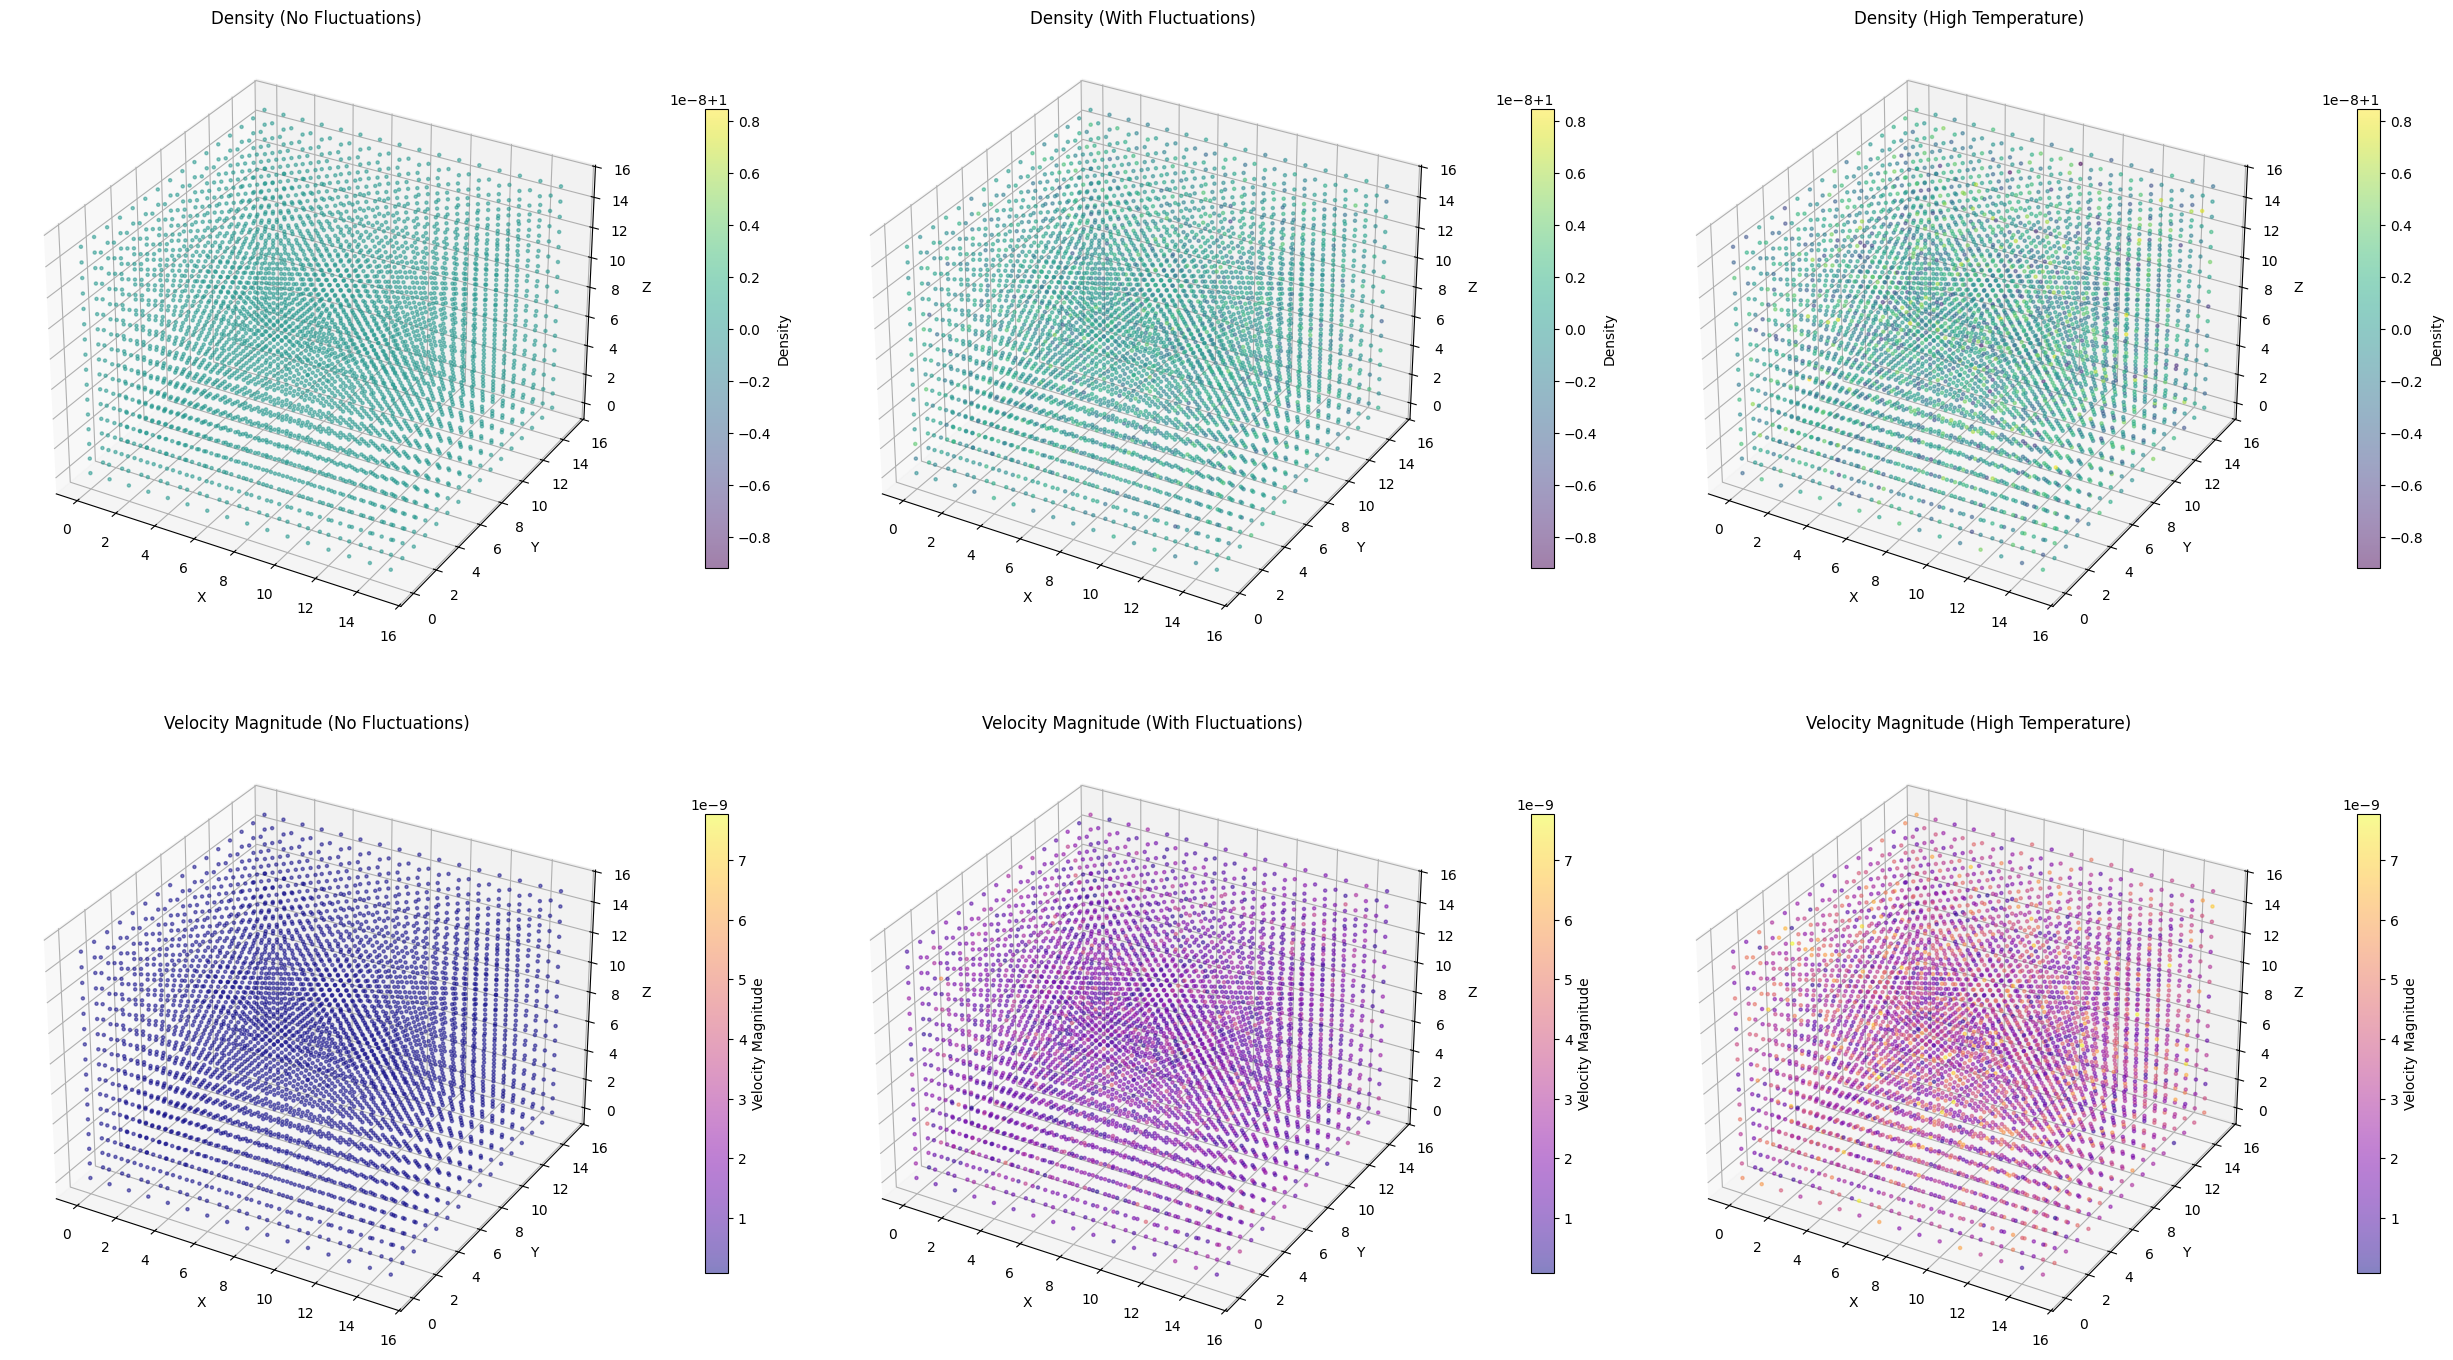

In [702]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

#####################################################################################################################################################################################
# Constants and Parameters
d = 3                               # Dimensionality of the problem (3D)
Q = 15                              # Number of discrete velocities in D3Q15 lattice model
rho_0 = 1.0                         # Initial fluid density
k_B = 1.380649e-23                  # Boltzmann constant (J/K)
T = 300                             # Temperature (K
L = 16                              # Lattice size
timesteps = 100                     # Number of simulation timesteps
vc = (1/np.sqrt(3))                 # Speed of sound in water (m/s)
tau = 0.75                          # Relaxation time (related to viscosity)
vc2 = vc**2                         # Speed of sound for the lattice

# Lattice spacing and time step
dx = 1.0e-9                         # Grid spacing in absolute units
dt = 0.3e-12                        # Time step in seconds (example value)
eta = 2/d * vc2 * (tau - 0.5)       # Fluid viscosity

#####################################################################################################################################################################################
# Lattice weights and velocities for D3Q15 model
w_i = np.array([2/9] + [1/9] * 6 + [1/72] * 8)
c_i = np.array([[0, 0, 0], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0],[0, 0, 1], [0, 0, -1], [1, 1, 1], [-1, -1, -1], [1, -1, 1],[-1, 1, -1], [1, 1, -1], [-1, -1, 1], [1, -1, -1], [-1, 1, 1]], dtype=np.int32)
             
#####################################################################################################################################################################################

def run_simulation(T=300, apply_fluctuations=True):
    """
    Run the Lattice Boltzmann simulation in 3D with D3Q15.
    :param T: Temperature in Kelvin
    :param apply_fluctuations: Boolean to enable/disable thermal noise
    :return: Final density and velocity magnitude
    
    """
        
    # Initialize variables
    f = np.ones((L, L, L, Q)) * (rho_0 / Q)     # Distribution function
    f_eq = np.zeros_like(f)                     # Equilibrium distribution
    rho = np.ones((L, L, L)) * rho_0            # Fluid density
    u = np.zeros((L, L, L, d))                  # Fluid velocity components
    u_magnitude_history = []
    u_over_time = []

#####################################################################################################################################################################################
    # Generate Noise for Thermal fluctuations
    def thermal_fluctuations(): 
            if not apply_fluctuations:
                return np.zeros((L, L, L, Q))
            ξH = np.random.randn(L, L, L, Q) * np.sqrt(2 * k_B * T * eta / tau)
            ξG = np.random.randn(L, L, L, Q) * np.sqrt(2 * k_B * T * eta / tau)
            ξ = ξH + ξG
            return ξ

#####################################################################################################################################################################################
    # Compute Equilibrium Distribution
    def compute_equilibrium(rho, u):
        cu = np.einsum('qa,xyzb->xyzq', c_i, u)
        usqr = np.sum(u**2, axis=-1, keepdims=True)
        f_eq = w_i * rho[..., None] * (
            1 + 3 * cu / vc2 +
            9 * cu**2 / (2 * vc2**2) -
            3 * usqr / (2 * vc2)
        )
        return f_eq

#####################################################################################################################################################################################
    # Collision Step (BGK Relaxation with Noise)
    def collision_step():
        nonlocal f
        f_eq = compute_equilibrium(rho, u)
        ξ = thermal_fluctuations()
        f += -(dt / tau) * (f - f_eq) + ξ

#####################################################################################################################################################################################
    # Streaming Step with Periodic Boundary Conditions
    def streaming_step():
        nonlocal f
        f_new = np.zeros_like(f)
        for i in range(Q):
            shift = tuple(c_i[i])
            f_new[:, :, :, i] = np.roll(f[:, :, :, i], shift=shift, axis=(0, 1, 2))
        f[:] = f_new

#####################################################################################################################################################################################
    # Update macroscopic variables (density and velocity)
    def update_macroscopic_variables():
        nonlocal rho, u
        rho = np.sum(f, axis=-1)
        for a in range(d):
            u[:, :, :, a] = np.sum(f * c_i[:, a], axis=-1) / rho

#####################################################################################################################################################################################
    # Main Simulation Loop
    for t in range(timesteps):
        collision_step()
        streaming_step()
        update_macroscopic_variables()
        
        mean_u = np.mean(np.linalg.norm(u, axis=-1))
        u_magnitude_history.append(mean_u)
        
        u_over_time.append(np.copy(u))
                
        if t % 100 == 0:
            print(f"T={T}, Fluct={'Yes' if apply_fluctuations else 'No'}, Step {t}...")
            
    return rho, np.linalg.norm(u, axis=-1), u_magnitude_history, u_over_time

#####################################################################################################################################################################################
# Run the simulation with and without thermal fluctuations
rho_nofluct, u_nofluct, u_hist_nofluct, u_fluct_over_time_1 = run_simulation(T=300, apply_fluctuations=False)
rho_fluct, u_fluct, u_hist_fluct, u_fluct_over_time_2 = run_simulation(T=300, apply_fluctuations=True)
rho_highT, u_highT, u_hist_highT, u_fluct_over_time_3 = run_simulation(T=900, apply_fluctuations=True)

#####################################################################################################################################################################################
# Plotting the results
fig = plt.figure(figsize=(25, 15))
titles = [
    "Density (No Fluctuations)", "Density (With Fluctuations)", "Density (High Temperature)",
    "Velocity Magnitude (No Fluctuations)", "Velocity Magnitude (With Fluctuations)", "Velocity Magnitude (High Temperature)"
]

data = [
    rho_nofluct, rho_fluct, rho_highT,
    u_nofluct, u_fluct, u_highT
]

cmaps = ['viridis'] * 3 + ['plasma'] * 3

vmin_rho = min(np.min(rho_fluct), np.min(rho_highT))
vmax_rho = max(np.max(rho_fluct), np.max(rho_highT))
vmin_u = min(np.min(u_fluct), np.min(u_highT))
vmax_u = max(np.max(u_fluct), np.max(u_highT))

x, y, z = np.meshgrid(np.arange(L), np.arange(L), np.arange(L), indexing='ij')
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    
    vals = data[i].flatten()
    cmap = cmaps[i]
    
    vmin = vmin_rho if i < 3 else vmin_u
    vmax = vmax_rho if i < 3 else vmax_u
    
    sc = ax.scatter(x_flat, y_flat, z_flat, c=vals, cmap=cmap, alpha=0.5, vmin=vmin, vmax=vmax, s=5)
    ax.set_title(titles[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
    cbar.set_label("Density" if i < 3 else "Velocity Magnitude")

plt.tight_layout()
plt.show()

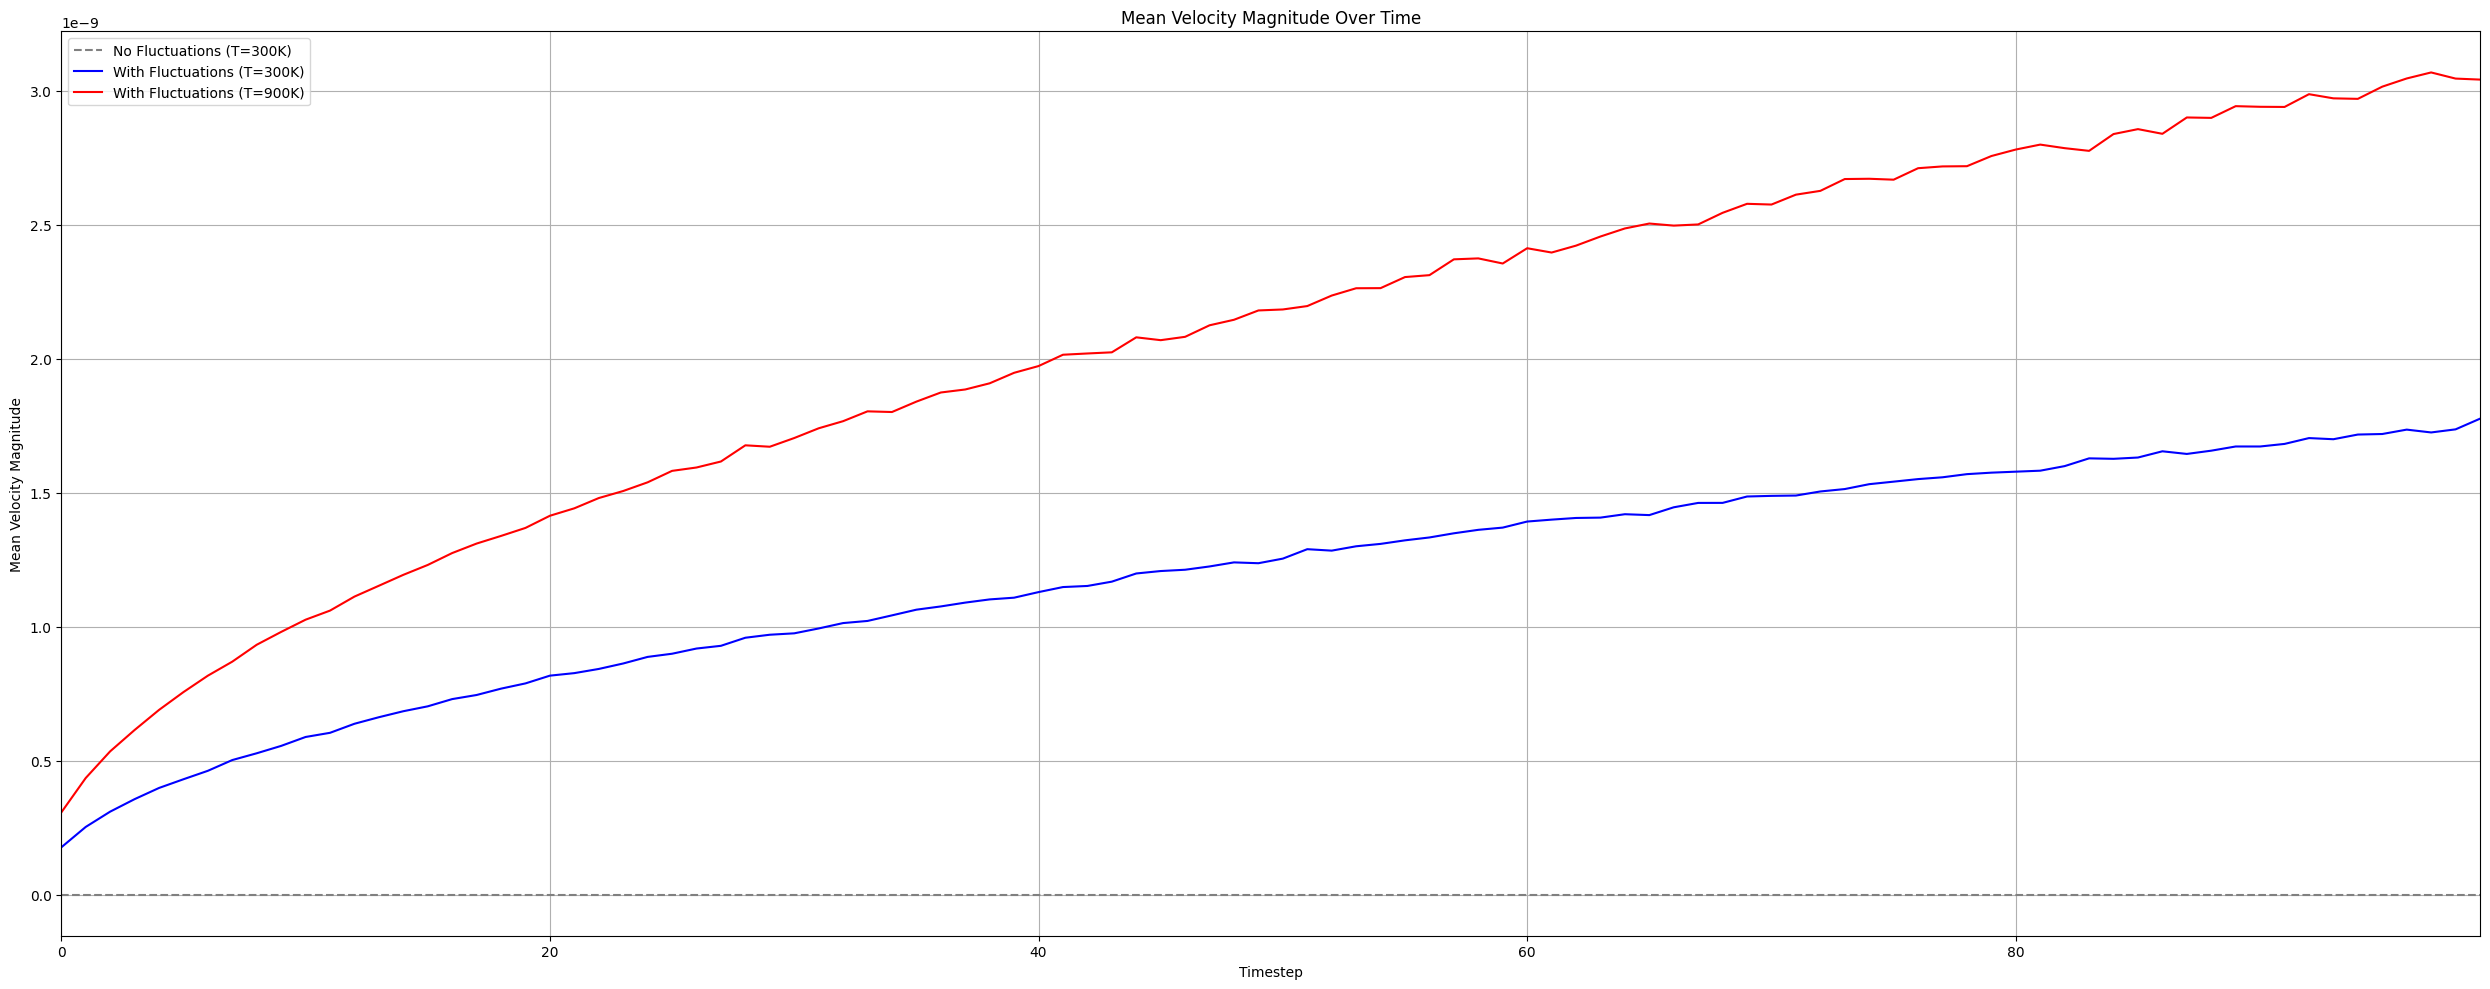

In [703]:
#####################################################################################################################################################################################
# Plotting mean velocity results

plt.figure(figsize=(25, 10))
plt.plot(u_hist_nofluct, label='No Fluctuations (T=300K)', linestyle='--', color='gray')
plt.plot(u_hist_fluct, label='With Fluctuations (T=300K)', color='blue')
plt.plot(u_hist_highT, label='With Fluctuations (T=900K)', color='red')
plt.xlabel("Timestep")
plt.ylabel("Mean Velocity Magnitude")
plt.title("Mean Velocity Magnitude Over Time")
plt.xlim(0, len(u_hist_highT)-1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [704]:
#####################################################################################################################################################################################
# Creating animation

def update_velocity_magnitude_3d(frame):
    u_nofluct = u_fluct_over_time_1[frame]
    u_fluct_300K = u_fluct_over_time_2[frame]
    u_fluct_900K = u_fluct_over_time_3[frame]

    u_mag_nofluct = np.linalg.norm(u_nofluct, axis=-1)
    u_mag_fluct_300K = np.linalg.norm(u_fluct_300K, axis=-1)
    u_mag_fluct_900K = np.linalg.norm(u_fluct_900K, axis=-1)

    sc1.set_offsets(np.c_[x_flat, y_flat, z_flat])
    sc2.set_offsets(np.c_[x_flat, y_flat, z_flat])
    sc3.set_offsets(np.c_[x_flat, y_flat, z_flat])

    sc1.set_array(u_mag_nofluct.flatten())
    sc2.set_array(u_mag_fluct_300K.flatten())
    sc3.set_array(u_mag_fluct_900K.flatten())

    ax1.set_title(f"No Fluctuations - Step {frame}")
    ax2.set_title(f"Fluctuations (T=300K) - Step {frame}")
    ax3.set_title(f"Fluctuations (T=900K) - Step {frame}")

    return [sc1, sc2, sc3]

fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

x, y, z = np.meshgrid(np.arange(L), np.arange(L), np.arange(L), indexing='ij')
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

u_initial_nofluct = np.linalg.norm(u_fluct_over_time_1[-1], axis=-1)
u_initial_fluct_300K = np.linalg.norm(u_fluct_over_time_2[-1], axis=-1)
u_initial_fluct_900K = np.linalg.norm(u_fluct_over_time_3[-1], axis=-1)

vmin_velocity = min(np.min(u_initial_nofluct), np.min(u_initial_fluct_300K), np.min(u_initial_fluct_900K))
vmax_velocity = max(np.max(u_initial_nofluct), np.max(u_initial_fluct_300K), np.max(u_initial_fluct_900K))

sc1 = ax1.scatter(x_flat, y_flat, z_flat, c=u_initial_nofluct.flatten(), cmap='plasma', vmin=vmin_velocity, vmax=vmax_velocity)
sc2 = ax2.scatter(x_flat, y_flat, z_flat, c=u_initial_fluct_300K.flatten(), cmap='plasma', vmin=vmin_velocity, vmax=vmax_velocity)
sc3 = ax3.scatter(x_flat, y_flat, z_flat, c=u_initial_fluct_900K.flatten(), cmap='plasma', vmin=vmin_velocity, vmax=vmax_velocity)

ax1.set_title("No Fluctuations - Step 0")
ax2.set_title("Fluctuations (T=300K) - Step 0")
ax3.set_title("Fluctuations (T=900K) - Step 0")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
plt.colorbar(sc1, ax=ax1, shrink=0.4, pad=0.1)
plt.colorbar(sc2, ax=ax2, shrink=0.4, pad=0.1)
plt.colorbar(sc3, ax=ax3, shrink=0.4, pad=0.1)

plt.tight_layout()

FFMpegWriter = animation.FFMpegWriter(fps=10, metadata=dict(artist='Matplotlib', title='Velocity Magnitude 3D Animation'))
ani = animation.FuncAnimation(fig, update_velocity_magnitude_3d, frames=len(u_fluct_over_time_3), interval=100, blit=False)
ani.save("velocity_magnitude_3d_animation.mp4", writer=FFMpegWriter)
plt.close(fig)
Video('velocity_magnitude_3d_animation.mp4')

# Fluctuating Lattice Boltzmann 2DQ9

T=300, Fluct=No, Step 0...
T=300, Fluct=No, Step 100...
T=300, Fluct=No, Step 200...
T=300, Fluct=No, Step 300...
T=300, Fluct=No, Step 400...
T=300, Fluct=Yes, Step 0...
T=300, Fluct=Yes, Step 100...
T=300, Fluct=Yes, Step 200...
T=300, Fluct=Yes, Step 300...
T=300, Fluct=Yes, Step 400...
T=900, Fluct=Yes, Step 0...
T=900, Fluct=Yes, Step 100...
T=900, Fluct=Yes, Step 200...
T=900, Fluct=Yes, Step 300...
T=900, Fluct=Yes, Step 400...


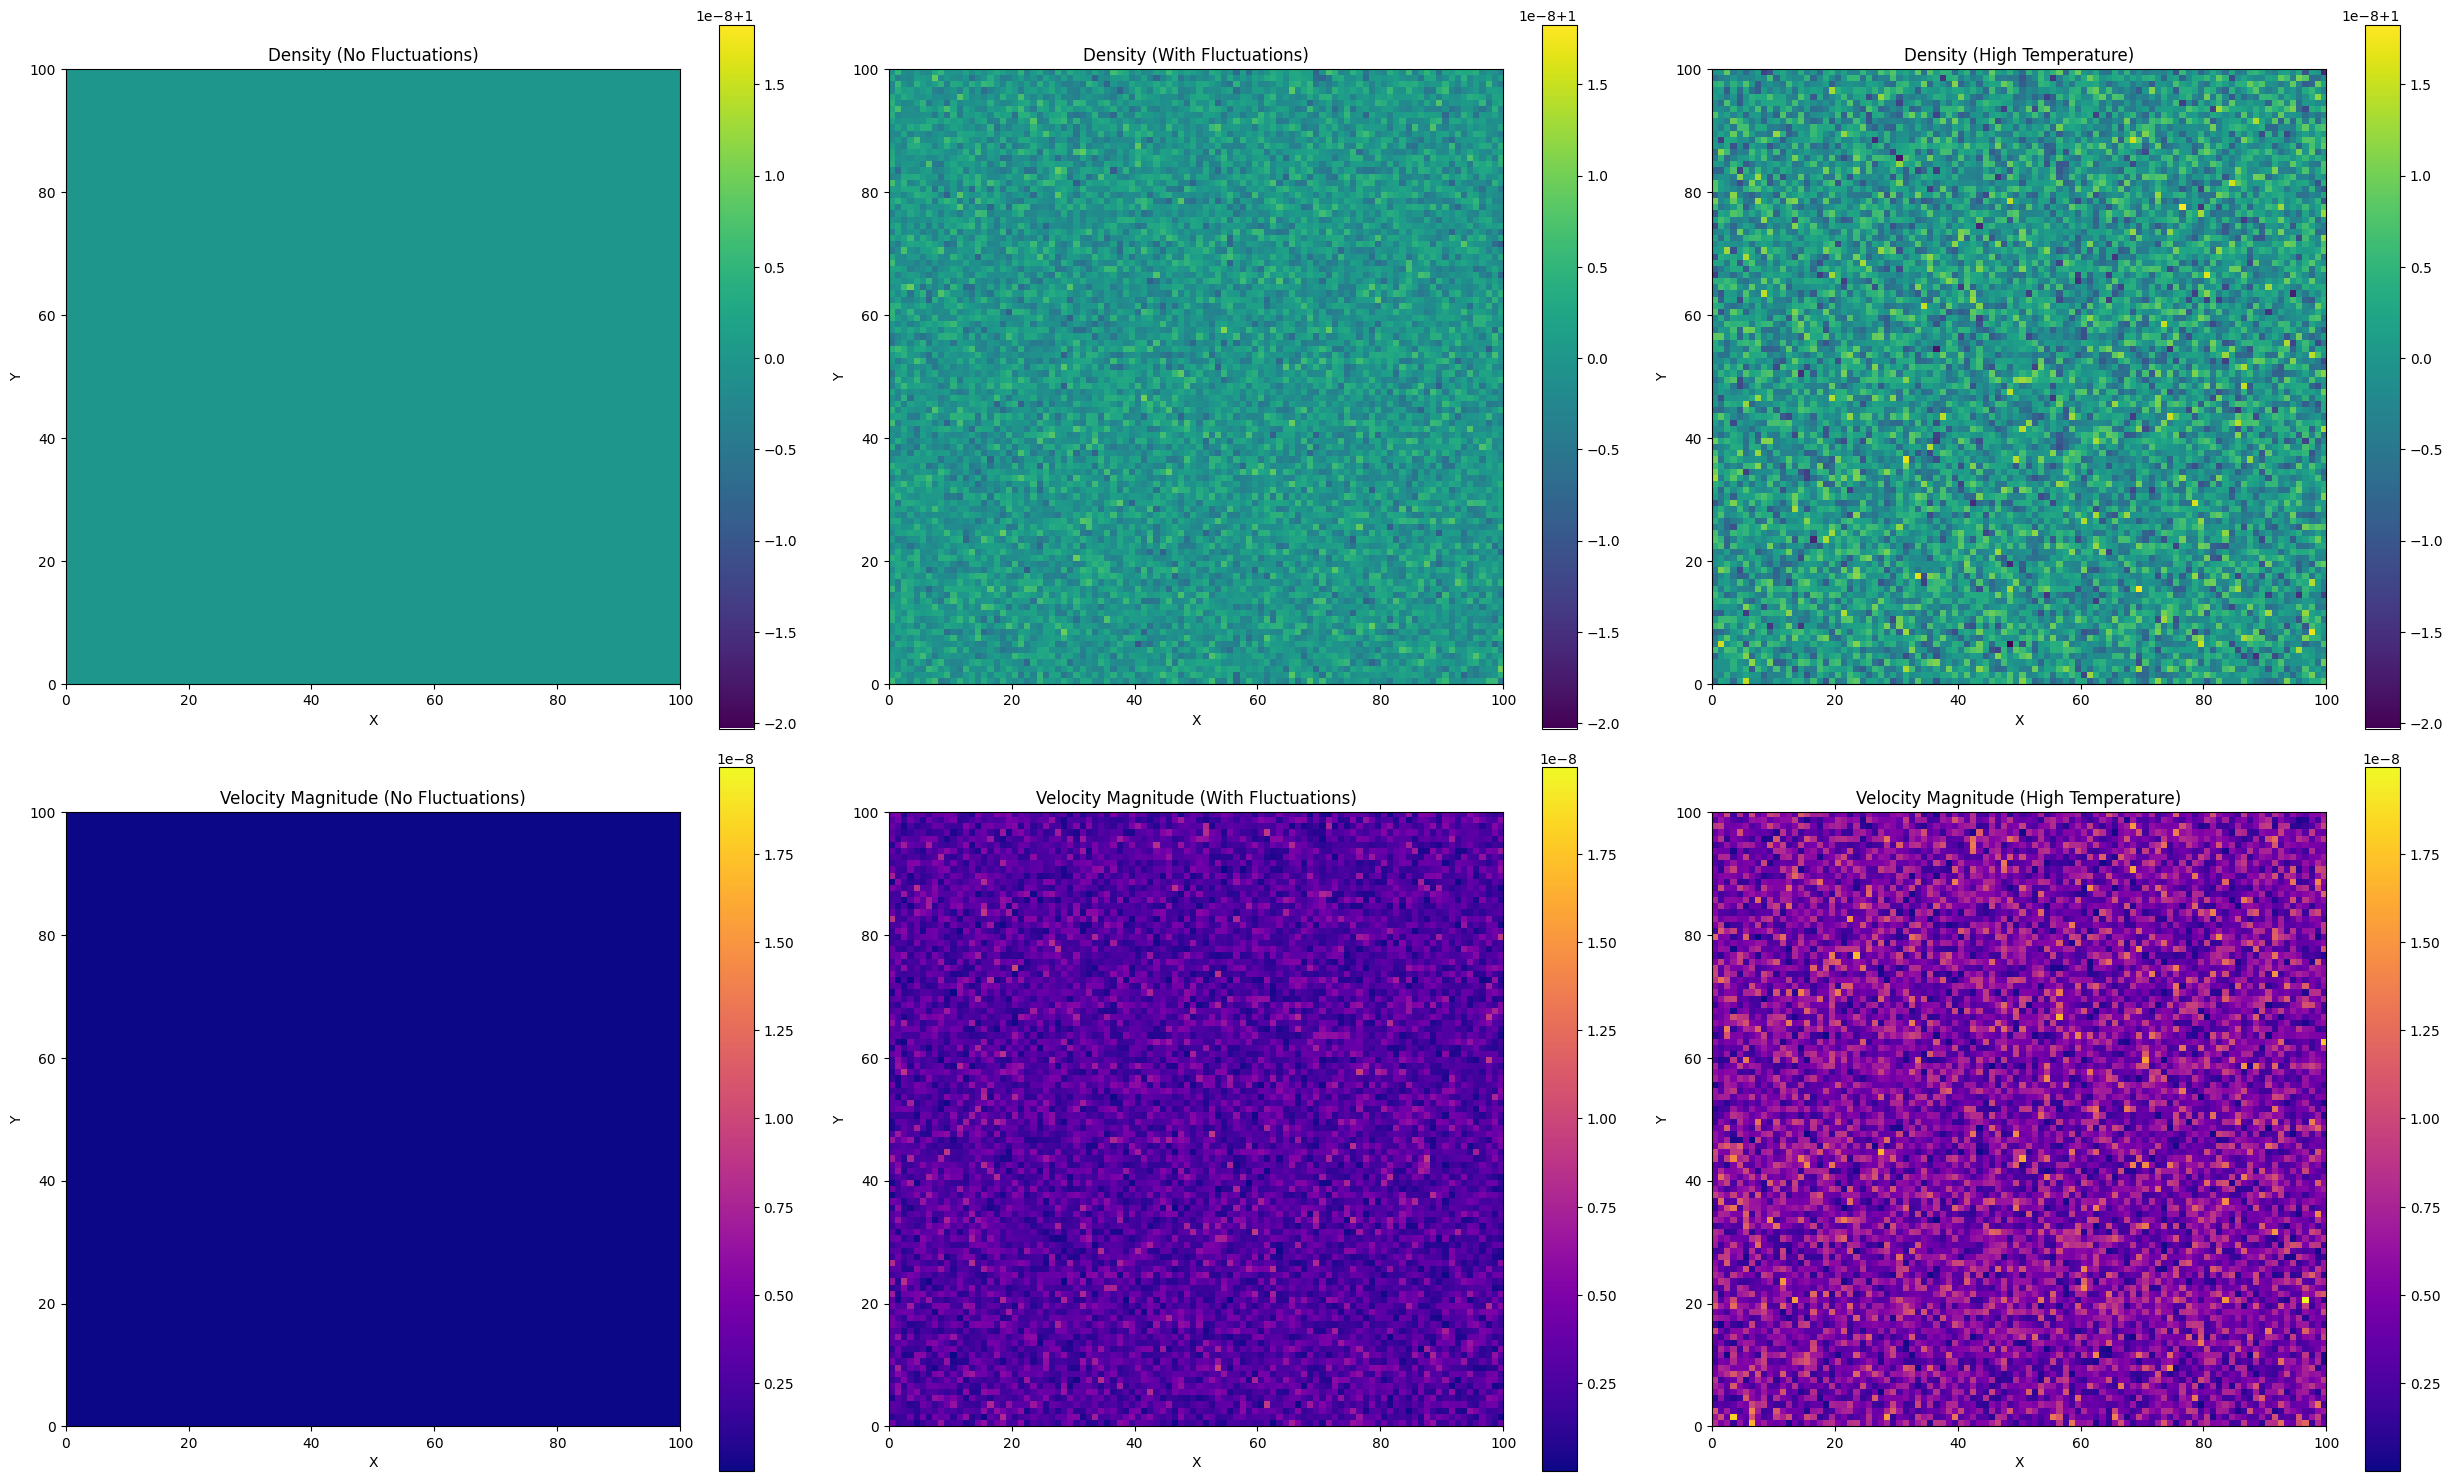

In [705]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video

%matplotlib inline

#####################################################################################################################################################################################
# Constants and Parameters for D2Q9
d = 2                               # Dimensionality of the problem (2D)
Q = 9                               # Number of discrete velocities in D2Q9 lattice model
rho_0 = 1.0                         # Initial fluid density
k_B = 1.380649e-23                  # Boltzmann constant (J/K)
T = 300                             # Temperature (K)
L = 100                             # Lattice size
timesteps = 500                    # Number of simulation timesteps
vc = (1/np.sqrt(3))                 # Speed of sound in water (m/s) for D2Q9
tau = 0.75                          # Relaxation time (related to viscosity)
vc2 = vc**2                         # Speed of sound for the lattice

# Lattice spacing and time step (user-defined)
dx = 1.0e-9                         # Grid spacing
dt = 0.3e-12                        # Time step in seconds
eta = 2/d * vc2 * (tau - 0.5)       # Bulk fluid viscosity

#####################################################################################################################################################################################
# Lattice weights and velocities for D2Q9 model
w_i = np.array([4/9] + [1/9] * 4 + [1/36] * 4)  # Weights for the 9 velocities
c_i = np.array([[0, 0], [1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [-1, -1], [1, -1], [-1, 1]], dtype=np.int32)  # Velocities for 2D
      
def run_simulation(T=300, apply_fluctuations=True):
    
    """
    Run the Lattice Boltzmann simulation with or without thermal fluctuations.
    :param T: Temperature in Kelvin
    :param apply_fluctuations: Boolean to apply thermal fluctuations or not
    """
    
#####################################################################################################################################################################################
    # Initialize variables
    f = np.ones((L, L, Q)) * (rho_0 / Q)     # Distribution function
    f_eq = np.zeros_like(f)                  # Equilibrium distribution
    rho = np.ones((L, L)) * rho_0            # Fluid density
    u = np.zeros((L, L, d))                  # Fluid velocity components
    u_magnitude_history = []
    u_over_time = []

#####################################################################################################################################################################################
    # Generate Noise for Thermal fluctuations
    def thermal_fluctuations(): 
        if not apply_fluctuations:
            return np.zeros((L, L, Q))
        ξH = np.random.randn(L, L, Q) * np.sqrt(2 * k_B * T * eta / tau)
        ξG = np.random.randn(L, L, Q) * np.sqrt(2 * k_B * T * eta / tau)
        ξ = ξH + ξG
        return ξ

#####################################################################################################################################################################################
    # Compute Equilibrium Distribution
    def compute_equilibrium_all(rho, u):
        cu = np.einsum('qa,xyb->xyq', c_i, u)
        usqr = np.sum(u**2, axis=-1, keepdims=True)
        feq = w_i[np.newaxis, np.newaxis, :] * rho[:, :, np.newaxis] * (
            1 + 3 * cu / vc2 + 9 * cu**2 / (2 * vc2**2) - 3 * usqr / (2 * vc2)
        )
        return feq

#####################################################################################################################################################################################
    # Collision Step (BGK Relaxation with Noise)
    def collision_step():
        nonlocal f
        ξi = thermal_fluctuations()
        f_eq = compute_equilibrium_all(rho, u)
        f += -(dt / tau) * (f - f_eq) + ξi

#####################################################################################################################################################################################
    # Streaming Step with Periodic Boundary Conditions
    def streaming_step():
        nonlocal f
        f_new = np.zeros_like(f)
        for i in range(Q):
            shift_x, shift_y = c_i[i]
            f_new[:, :, i] = np.roll(f[:, :, i], shift=(shift_x, shift_y), axis=(0, 1))
        f[:] = f_new

#####################################################################################################################################################################################
    # Update macroscopic variables (density and velocity)
    def update_macroscopic_variables():
        nonlocal rho, u
        rho = np.sum(f, axis=-1)
        for a in range(d):
            u[:, :, a] = np.sum(f * c_i[:, a], axis=-1) / rho

#####################################################################################################################################################################################
    # Main Simulation Loop
    for t in range(timesteps):
        collision_step()
        streaming_step()
        update_macroscopic_variables()
        
        mean_u = np.mean(np.linalg.norm(u, axis=-1))
        u_magnitude_history.append(mean_u)
        
        u_over_time.append(np.copy(u))
                
        if t % 100 == 0:
            print(f"T={T}, Fluct={'Yes' if apply_fluctuations else 'No'}, Step {t}...")
            
    return rho, np.linalg.norm(u, axis=-1), u_magnitude_history, u_over_time

#####################################################################################################################################################################################
# Run the simulation with and without thermal fluctuations
rho_nofluct, u_nofluct, u_hist_nofluct, u_fluct_over_time_1 = run_simulation(T=300, apply_fluctuations=False)
rho_fluct, u_fluct, u_hist_fluct, u_fluct_over_time_2 = run_simulation(T=300, apply_fluctuations=True)
rho_highT, u_highT, u_hist_highT, u_fluct_over_time_3 = run_simulation(T=900, apply_fluctuations=True)

#####################################################################################################################################################################################
# Plotting the results
fig, axs = plt.subplots(2, 3, figsize=(25, 15))

titles = [
    "Density (No Fluctuations)", "Density (With Fluctuations)", "Density (High Temperature)",
    "Velocity Magnitude (No Fluctuations)", "Velocity Magnitude (With Fluctuations)", "Velocity Magnitude (High Temperature)"
]

data = [
    rho_nofluct, rho_fluct, rho_highT,
    u_nofluct, u_fluct, u_highT,
]

vmin_density = min(np.min(rho_fluct), np.min(rho_highT))
vmax_density = max(np.max(rho_fluct), np.max(rho_highT))

vmin_velocity = min(np.min(u_fluct), np.min(u_highT))
vmax_velocity = max(np.max(u_fluct), np.max(u_highT))

extent = [0, L, 0, L]
for i, ax in enumerate(axs.flat):
    if i == 0 or i == 1 or i == 2:
        im = ax.imshow(data[i], cmap='viridis', origin='lower', vmin=vmin_density, vmax=vmax_density, extent=extent)
    elif i == 3 or i == 4 or i == 5:
        im = ax.imshow(data[i], cmap='plasma', origin='lower', vmin=vmin_velocity, vmax=vmax_velocity, extent=extent)

    ax.set_title(titles[i])
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

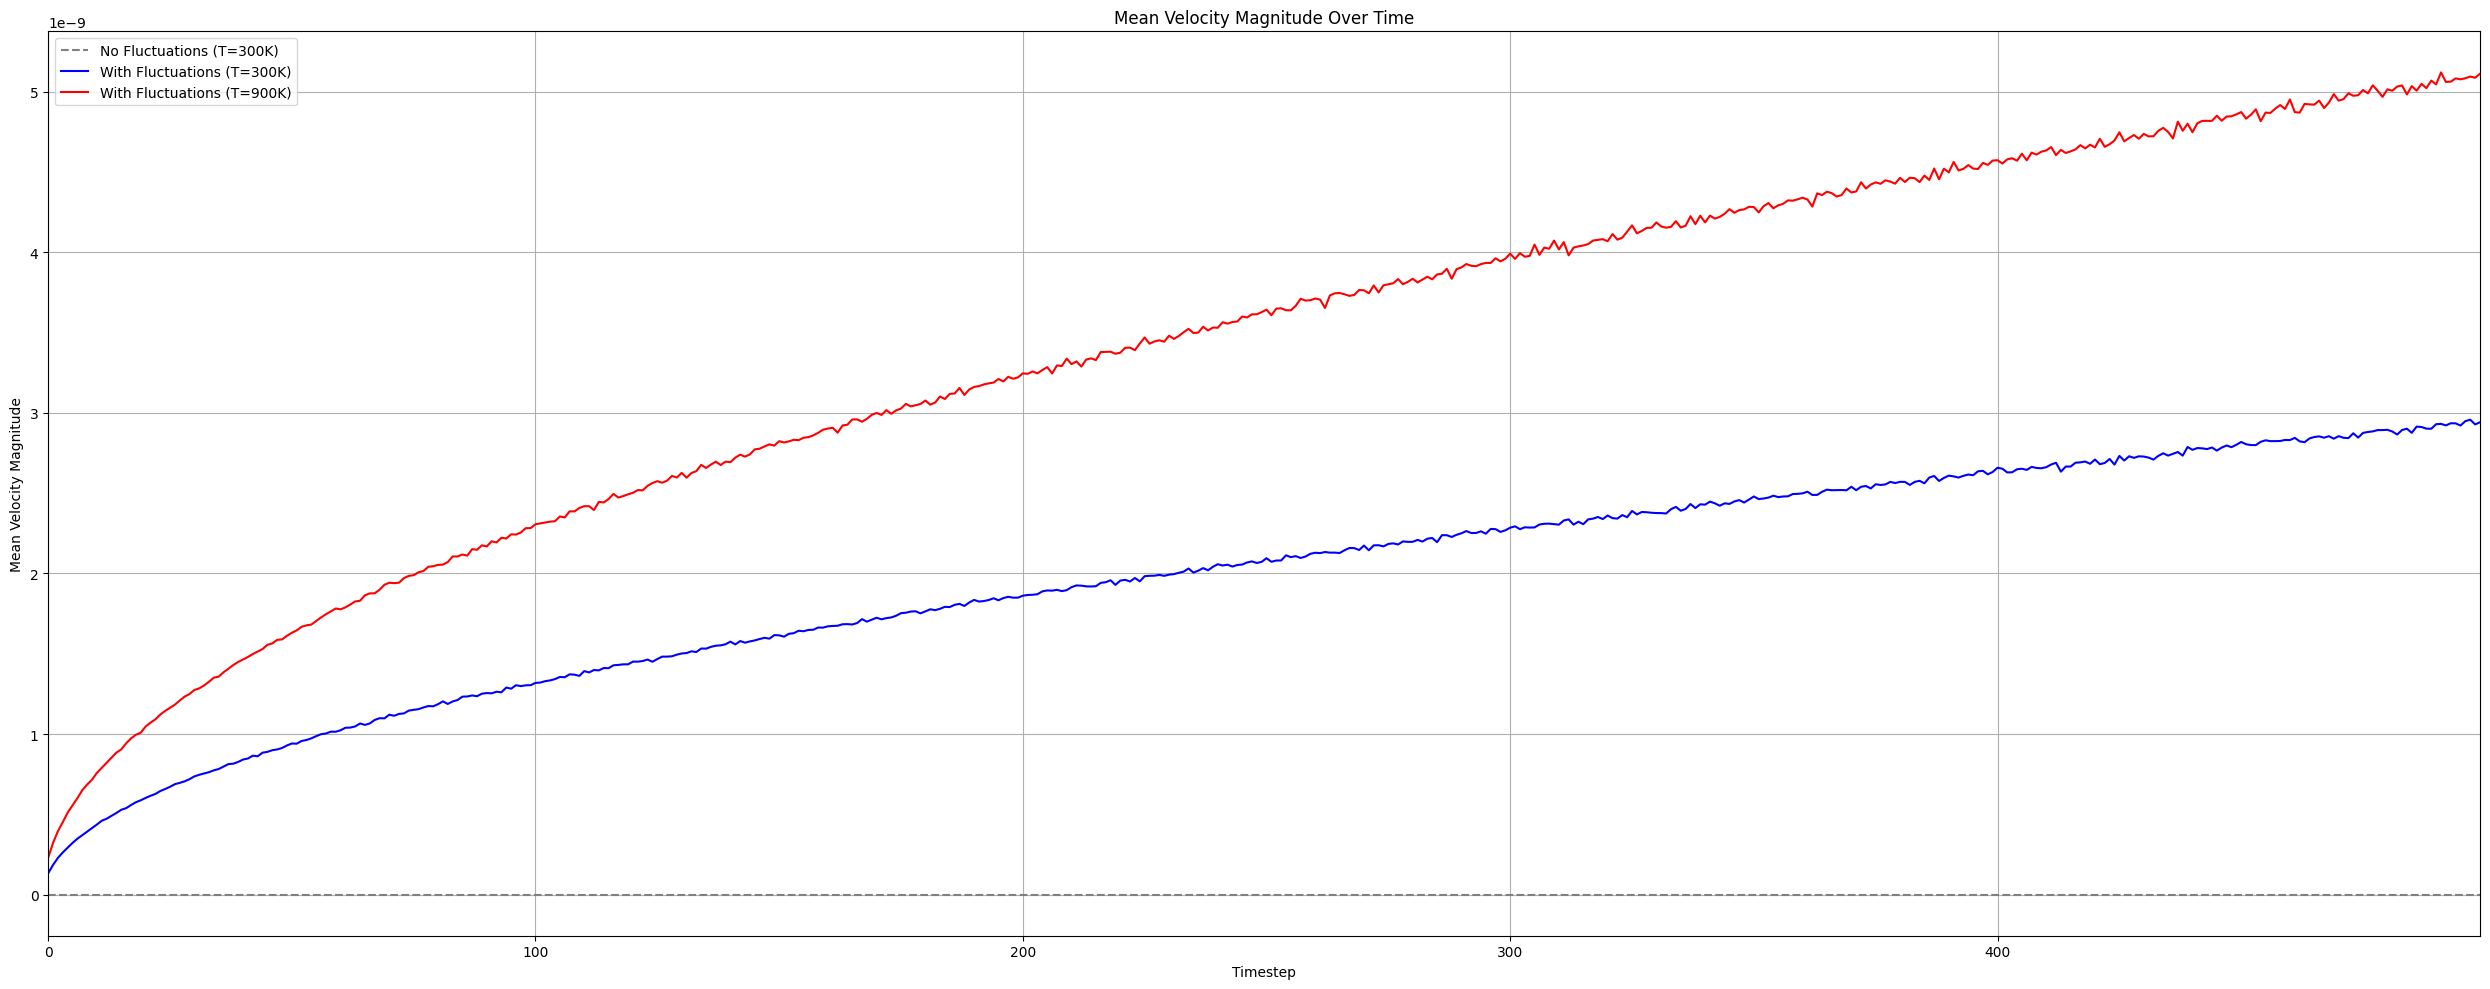

In [706]:
#####################################################################################################################################################################################
# Plotting mean velocity results

plt.figure(figsize=(25, 10))
plt.plot(u_hist_nofluct, label='No Fluctuations (T=300K)', linestyle='--', color='gray')
plt.plot(u_hist_fluct, label='With Fluctuations (T=300K)', color='blue')
plt.plot(u_hist_highT, label='With Fluctuations (T=900K)', color='red')
plt.xlabel("Timestep")
plt.ylabel("Mean Velocity Magnitude")
plt.title("Mean Velocity Magnitude Over Time")
plt.xlim(0, len(u_hist_highT)-1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [707]:
#####################################################################################################################################################################################
# Creating animation

def update_velocity_magnitude_side_by_side(frame):
    u_nofluct = u_fluct_over_time_1[frame]
    u_fluct_300K = u_fluct_over_time_2[frame]
    u_fluct_900K = u_fluct_over_time_3[frame]
    
    u_mag_nofluct = np.linalg.norm(u_nofluct, axis=-1)
    u_mag_fluct_300K = np.linalg.norm(u_fluct_300K, axis=-1)
    u_mag_fluct_900K = np.linalg.norm(u_fluct_900K, axis=-1)
    
    im1.set_array(u_mag_nofluct)
    im2.set_array(u_mag_fluct_300K)
    im3.set_array(u_mag_fluct_900K)
    
    ax1.set_title(f"No Fluctuations - Step {frame}")
    ax2.set_title(f"Fluctuations (T=300K) - Step {frame}")
    ax3.set_title(f"Fluctuations (T=900K) - Step {frame}")
    
    return [im1, im2, im3]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
extent = [0, L, 0, L]
u_initial_nofluct = np.linalg.norm(u_fluct_over_time_1[-1], axis=-1)
u_initial_fluct_300K = np.linalg.norm(u_fluct_over_time_2[-1], axis=-1)
u_initial_fluct_900K = np.linalg.norm(u_fluct_over_time_3[-1], axis=-1)
vmin_velocity = min(np.min(u_initial_nofluct), np.min(u_initial_fluct_300K), np.min(u_initial_fluct_900K))
vmax_velocity = max(np.max(u_initial_nofluct), np.max(u_initial_fluct_300K), np.max(u_initial_fluct_900K))
im1 = ax1.imshow(u_initial_nofluct, cmap='plasma', origin='lower', vmin=vmin_velocity, vmax=vmax_velocity, extent=extent)
im2 = ax2.imshow(u_initial_fluct_300K, cmap='plasma', origin='lower', vmin=vmin_velocity, vmax=vmax_velocity, extent=extent)
im3 = ax3.imshow(u_initial_fluct_900K, cmap='plasma', origin='lower', vmin=vmin_velocity, vmax=vmax_velocity, extent=extent)
ax1.set_title("No Fluctuations - Step 0")
ax2.set_title("Fluctuations (T=300K) - Step 0")
ax3.set_title("Fluctuations (T=900K) - Step 0")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax1.set_xlim(0, L)
ax1.set_ylim(0, L)
ax2.set_xlim(0, L)
ax2.set_ylim(0, L)
ax3.set_xlim(0, L)
ax3.set_ylim(0, L)
plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)

FFMpegWriter = animation.FFMpegWriter(fps=100, metadata=dict(artist='Matplotlib', title='Velocity Magnitude Animation'))
ani = animation.FuncAnimation(fig, update_velocity_magnitude_side_by_side, frames=len(u_fluct_over_time_3), interval=100, blit=False)
ani.save("velocity_magnitude_side_by_side_animation.mp4", writer=FFMpegWriter)
plt.close(fig)
Video('velocity_magnitude_side_by_side_animation.mp4')

# Reflection

The implementation of the fluctuating Lattice Boltzmann Method (LBM) was partially successful. While the project produced meaningful visualizations and animations that illustrate the qualitative effects of thermal fluctuations, several deviations from the theoretical model and practical challenges impacted the overall fidelity and accuracy of the results

The core LBM framework—including the streaming and collision steps—was correctly implemented for both the 3DQ15 and 2DQ9 schemes. These schemes were able to evolve the system across multiple time steps, generating stable outputs for both velocity and density fields. The inclusion of thermal fluctuations was achieved to an extent, but due to the mathematical complexity involved in correctly modeling the stochastic noise and accounting for ghost mode contributions, a full implementation as prescribed in the literature was not realized. Instead a simplified approach was taken by introducing a gassian noise scaled by the factor:

$$\sqrt{2 k_B T \eta}{\tau}$$

Which was intended to mimic thermal fluctuations. While this did lead to visible perturbations in the system, the added noise lacked the correct spatial and temporal correlations required for a fully accurate representation. The ghost noise contributio was not properly incorporated due to time constraints and the complexity of its formulation resulting in the thermal equilibrium not being properly reached. Despite these limitations, the generated plots and animations succesfully illustrated the increase in fluctation intensity with rising temperature. 

# Conclusion and outlook

This project explored the incorporation of thermal fluctuations into the Lattice Boltzmann Method (LBM) by considering a fluctuating discrete Langevin equation at the lattice level. The target was to implement a fluctuation-consistent LBM formulation in which ghost modes are fully thermalized, thereby eliminating their dissipative effects on the hydrodynamic modes. The approach outlined in the reference paper presents way to improve the numerical equilibration of fluctuating quantities, offering a more physically consistent framework for mesoscopic simulations. However, due to the mathematical complexity of the derivation and time constraints, a full implementation of the fluctuation-consistent model was not achieved. Instead, a simplified version of the fluctuation term was introduced using randomly sampled Gaussian noise scaled by a temperature-dependent factor. While this does not capture the correct covariance structure of the noise as derived from the fluctuation-dissipation theorem, it still provides insight into the qualitative effects of thermal fluctuations on fluid behavior.

Despite its limitations, the simplified model was able to demonstrate key concepts—such as increased variability in density and velocity fields at higher temperatures and was useful in visualizing how thermal fluctuations can affect the evolution of flow systems.

Several extensions and improvements can be pursued: Future work could aim to fully implement the noise model described in the literature, including the proper handling of ghost modes and correct noise correlation structure.Another implementation could be the introduction of a jet stream into the system providing a compelling demonstration of how thermal fluctuations influence macroscopic trajectories, particularly under varying temperature conditions. One more key application area for fluctuating LBM is in modeling Brownian motion and colloidal systems, where accurate thermal noise modeling is essential. Incorporating this would enable simulations of particle diffusion and stochastic transport processes. Lastly running simulations on larger lattices and comparing results across different scales would offer more insight into the consistency and scalability of the approach.

Overall, this work provides a foundational step toward implementing fluctuating hydrodynamics in the Lattice Boltzmann framework with a clear path for future developments and applications.

# References

Adhikari, R., et al. "Fluctuating lattice boltzmann." Europhysics Letters 71.3 (2005): 473.

Ollila, Santtu TT, et al. "Fluctuating lattice-Boltzmann model for complex fluids." The Journal of chemical physics 134.6 (2011).

Succi, Sauro. The lattice Boltzmann equation: for complex states of flowing matter. Oxford university press, 2018.